In [310]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.datasets import load_boston, load_iris

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS

In [132]:
#x, y = load_iris(return_X_y=True)
x, y = load_boston(return_X_y=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = x[:,[1,7]]
x.shape

(506, 2)

In [131]:
# nx=3
# for i in range(0,12):
#     plt.figure()
#     plt.scatter(x=x[:,nx], y=x[:,i])
#     plt.title('X:' + str(nx) + ' ; Y:' + str(i))
#     plt.plot()

Text(0.5, 1.0, 'Reachability Plot')

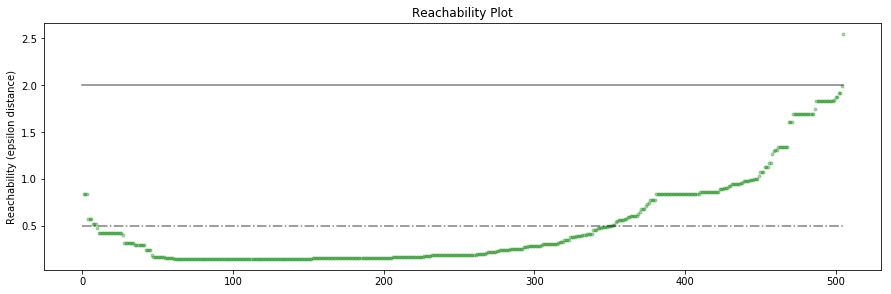

In [153]:
clust = OPTICS(min_samples=int(0.1*len(x)), xi=0.05, min_cluster_size=0.05)
clust.fit(x)

plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
    
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

In [143]:
labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)

labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

In [144]:
space = np.arange(len(x))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

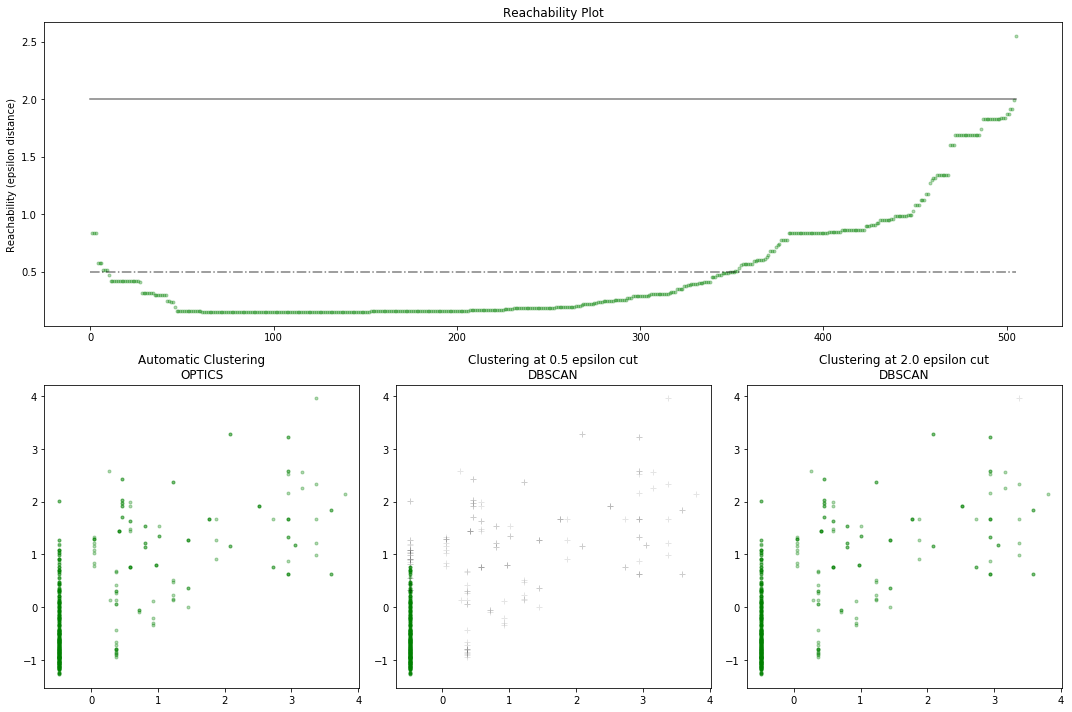

In [145]:
c
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
    
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = x[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(x[clust.labels_ == -1, 0], x[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = x[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(x[labels_050 == -1, 0], x[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = x[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(x[labels_200 == -1, 0], x[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Automatic Clustering\nOPTICS')

In [250]:
x, y = load_boston(return_X_y=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = x[:,[1,7]]
x.shape

(506, 2)

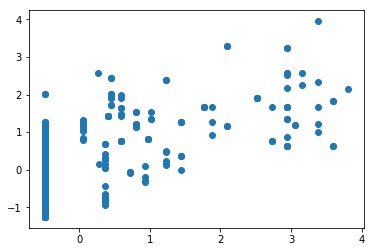

In [251]:
plt.scatter(x=X[:,0], y=X[:,1])

https://dataplatform.cloud.ibm.com/analytics/notebooks/54d79c2a-f155-40ec-93ec-ed05b58afa39/view?access_token=6d8ec910cf2a1b3901c721fcb94638563cd646fe14400fecbb76cea6aaae2fb1

In [303]:
def get_avg_knn_dist(values, k):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(values) # +1 because first neighbour is the point itself
    distances, indices = nbrs.kneighbors(values)
    
    return np.sort(distances[:,1:].mean(axis=1))

def get_distances_to_line(values):
    nPoints = len(values)
    allCoord = np.vstack((range(nPoints), values)).T

    firstPoint = allCoord[0]
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))

    vecFromFirst = allCoord - firstPoint

    scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel

    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))

    return distToLine

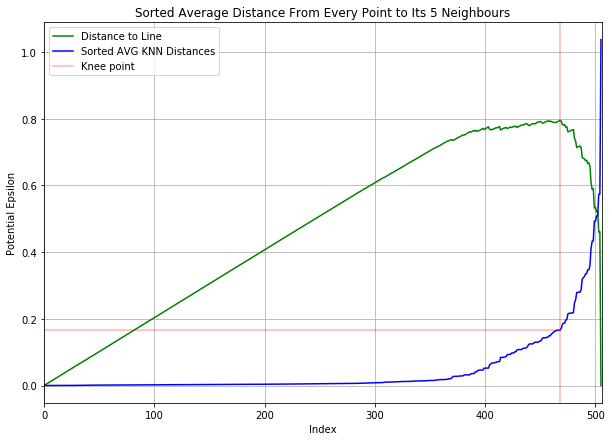

In [313]:
K=5

plt.figure(figsize=(10, 7))

plt.plot(distToLine, label='Distance to Line', c='g')
plt.plot(avg_distances, label='Sorted AVG KNN Distances', c='b')

plt.xlim((0,len(avg_distances)))

plt.axhline(y=avg_distances[idxOfBestPoint], xmin=0, xmax=idxOfBestPoint / len(avg_distances), c='r', alpha=0.3)
plt.axvline(x=idxOfBestPoint, c='r', alpha=0.3, label='Knee point')
plt.xlabel('Index')

plt.title('Sorted Average Distance From Every Point to Its ' + str(K) + ' Neighbours')
plt.xlabel('Index')
plt.ylabel('Potential Epsilon')

plt.legend()
plt.grid()